In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('youtube_recommendation_dataset -.csv')

## Imports e configurações iniciais

In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Carregar e inspecionar o dataset

In [6]:
# Informações iniciais
print('Shape:', df.shape)
print('\nColunas:')
print(df.columns.tolist())


# Mostrar primeiras linhas
display(df.head())


# Estatísticas descritivas
display(df.describe(include='all').T)


# Tipos e contagem de nulos
display(df.info())
print('\nNulos por coluna:\n', df.isnull().sum())

Shape: (537, 16)

Colunas:
['Title', 'channel_title', 'published_at', 'category_id', 'view_count', 'like_count', 'comment_count', 'favorite_count', 'duration', 'definition', 'caption', 'engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio', 'duration_seconds', 'video_age_days']


,Title,channel_title,published_at,category_id,view_count,like_count,comment_count,favorite_count,duration,definition,caption,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
0,LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...,AlofokeMusicSounds,2025-11-16 15:34:55+00:00,10,1405647,140463,9063,0,PT1M51S,hd,False,0.106375,0.099928,0.006448,111,1
1,Moana | Official Teaser,Disney,2025-11-17 17:00:47+00:00,24,2776847,26801,6684,0,PT1M,hd,True,0.012059,0.009652,0.002407,60,0
2,$0 - $1 Trillion Only FISHING in Steal a Brain...,CaylusBlox,2025-11-17 22:57:14+00:00,20,1189857,16174,1827,0,PT18M2S,hd,False,0.015129,0.013593,0.001535,1082,0
3,ALLDAY PROJECT - ‘ONE MORE TIME’ M/V,THEBLACKLABEL,2025-11-17 09:00:07+00:00,10,5319161,0,12869,0,PT3M23S,hd,True,0.002419,0.000000,0.002419,203,1
4,La Lupa | Vendetta Hero Trailer | Overwatch 2,PlayOverwatch,2025-11-17 17:00:06+00:00,20,597542,41742,4728,0,PT3M35S,hd,True,0.077768,0.069856,0.007912,215,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,537,533,Must Play Mobile Game-Epic War!😎 #shorts #game...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,537,344,freeCodeCamp.org,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_at,537,537,2025-08-24 16:00:39+00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,537.0,NaN,NaN,NaN,22.456238,5.854776,1.0,20.0,24.0,27.0,28.0
view_count,537.0,NaN,NaN,NaN,21457518.182495,40151999.735213,0.0,2676921.0,6385911.0,22706041.0,369731024.0
like_count,537.0,NaN,NaN,NaN,433604.389199,838671.051648,0.0,55591.0,155055.0,463189.0,10879340.0
comment_count,537.0,NaN,NaN,NaN,7125.700186,36075.115032,0.0,1018.0,2354.0,5925.0,810641.0
favorite_count,537.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
duration,537,366,PT1M,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
definition,537,2,hd,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    537 non-null    object 
 1   channel_title            537 non-null    object 
 2   published_at             537 non-null    object 
 3   category_id              537 non-null    int64  
 4   view_count               537 non-null    int64  
 5   like_count               537 non-null    int64  
 6   comment_count            537 non-null    int64  
 7   favorite_count           537 non-null    int64  
 8   duration                 537 non-null    object 
 9   definition               537 non-null    object 
 10  caption                  537 non-null    bool   
 11  engagement_rate          537 non-null    float64
 12  likes_to_views_ratio     537 non-null    float64
 13  comments_to_views_ratio  537 non-null    float64
 14  duration_seconds         5

None


Nulos por coluna:
 Title                      0
channel_title              0
published_at               0
category_id                0
view_count                 0
like_count                 0
comment_count              0
favorite_count             0
duration                   0
definition                 0
caption                    0
engagement_rate            0
likes_to_views_ratio       0
comments_to_views_ratio    0
duration_seconds           0
video_age_days             0
dtype: int64


## Escolha da variável-alvo e hipóteses de negócio

In [7]:
# Estratégia automática para escolha da variável alvo (exemplo):
# - Se existir coluna 'views' (numérica) consideramos regressão (prever views).
# - Se existir coluna 'category' ou 'label' com poucas classes, consideramos classificação.


candidates_reg = [c for c in df.columns if c.lower() in ['views','view_count','likes','dislikes','comment_count','watch_time']]
candidates_clf = [c for c in df.columns if c.lower() in ['category','label','class','genre','is_recommended','target']]


TARGET = None
TASK = None


if candidates_reg:
    TARGET = candidates_reg[0]
    TASK = 'regression'
elif candidates_clf:
    TARGET = candidates_clf[0]
    TASK = 'classification'

# fallback: escolher a primeira coluna numérica com var>0
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols)>0:
    TARGET = numeric_cols[0]
    TASK = 'regression'
else:
    TARGET = df.columns[0]
    TASK = 'classification'


print('TASK:', TASK)
print('TARGET:', TARGET)

TASK: regression
TARGET: category_id


## Detecção e tratamento de outliers (boxplot + IQR)

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()


from scipy import stats


outlier_summary = {}
for c in num_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = df[(df[c] < lower) | (df[c] > upper)][c]
    outlier_summary[c] = len(outliers)


# Mostrar colunas com outliers
{k: v for k,v in outlier_summary.items() if v>0}


# Estratégia: opcional winsorization para colunas muito assimétricas (não feito automaticamente aqui)

{'category_id': 10,
 'view_count': 62,
 'like_count': 52,
 'comment_count': 61,
 'engagement_rate': 21,
 'likes_to_views_ratio': 21,
 'comments_to_views_ratio': 64,
 'duration_seconds': 80,
 'video_age_days': 17}

## Visualizações (histogramas, boxplots, pairplot, heatmap)

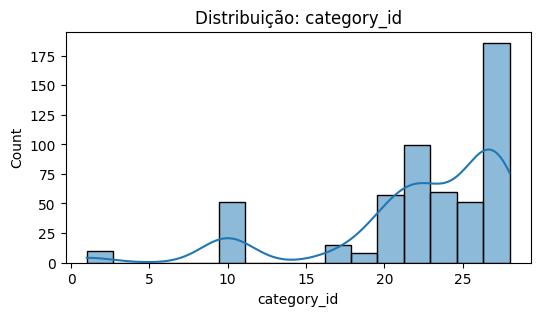

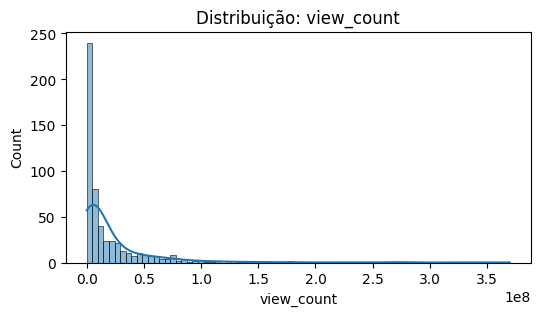

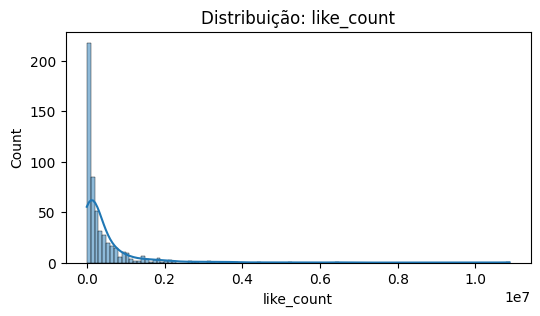

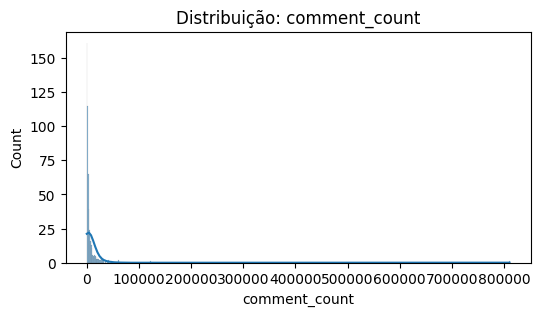

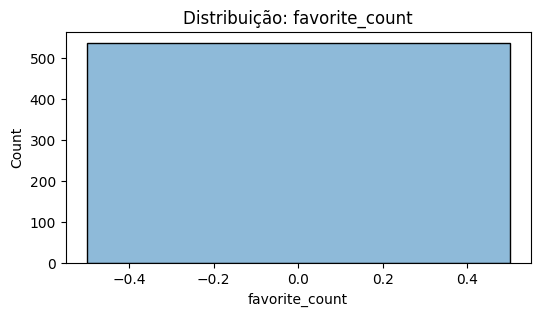

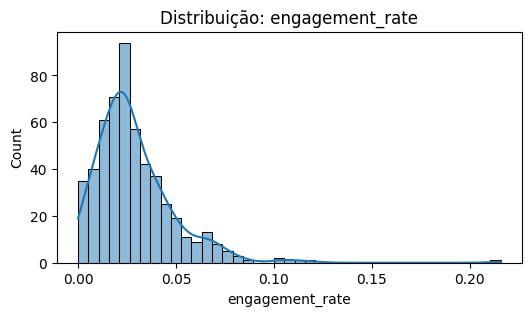

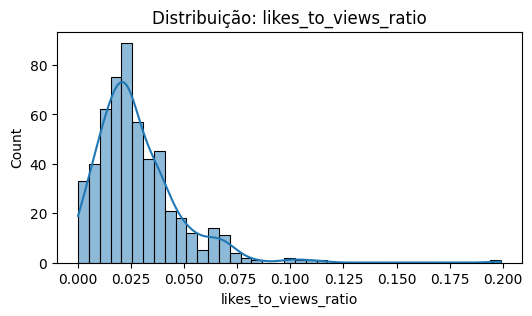

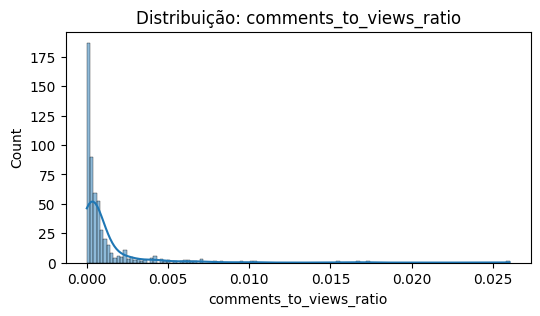

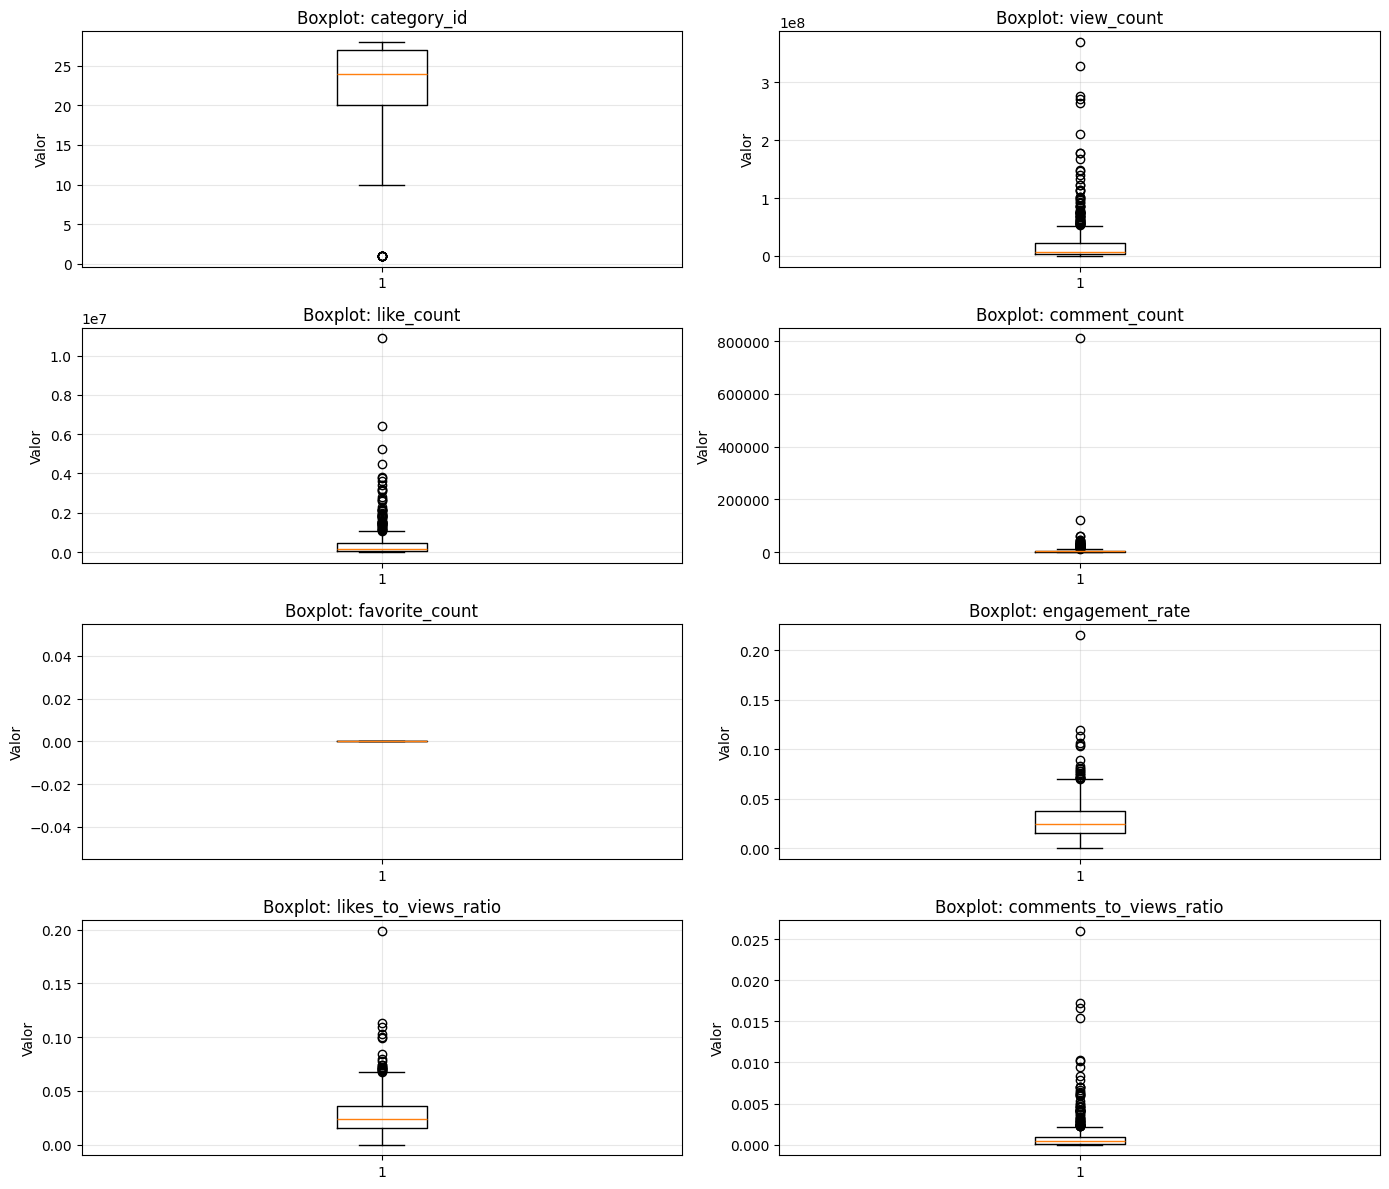

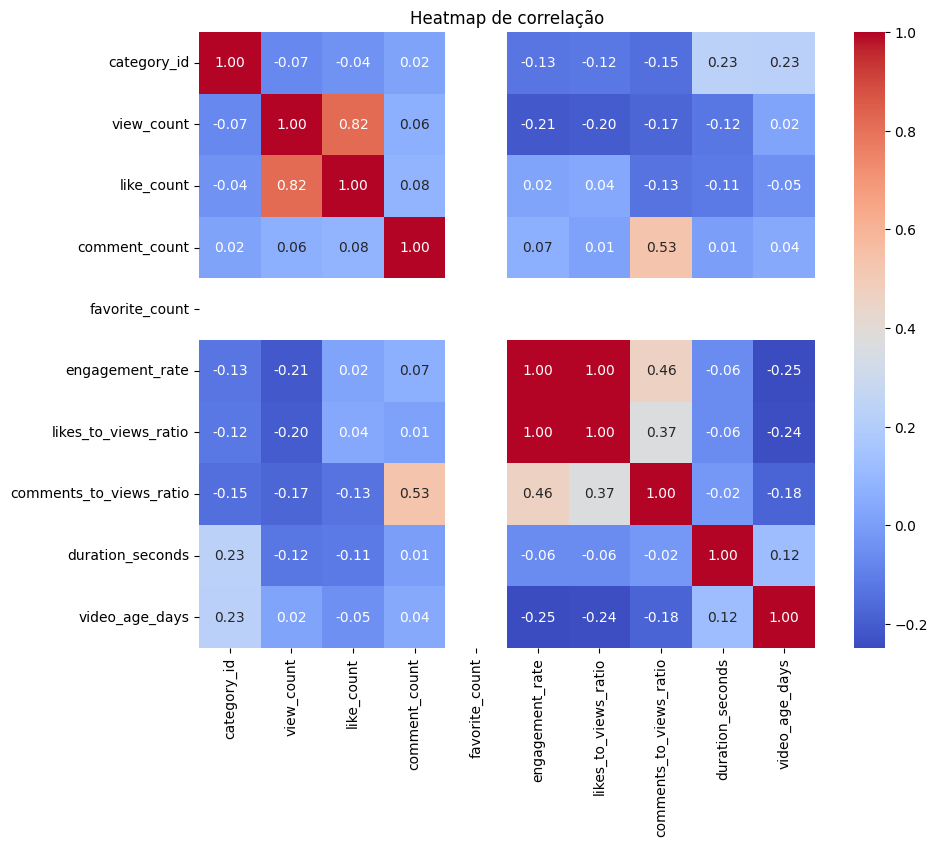

In [9]:
# Histogramas básicos
for c in num_cols[:8]:
    plt.figure(figsize=(6,3))
    sns.histplot(df[c], kde=True)
    plt.title(f'Distribuição: {c}')
    plt.show()

## Boxplots e Distribuição de Outliers

# Boxplots para detectar outliers visualmente
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols[:8]):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Boxplot: {col}')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Heatmap de correlação (numéricas)
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap de correlação')
plt.show()

## Modelagem — Regressão

In [10]:
if TASK != 'regression':
    print('Pular seção de regressão: tarefa é', TASK)
else:
    # Escolher features: remover colunas identificadoras e a própria TARGET
    features = [c for c in df.columns if c != TARGET]
    X = df[features].select_dtypes(include=[np.number]).copy()
    y = df[TARGET]


    # Preencher/transformar categóricas (ex.: One-Hot) - aqui usamos apenas numéricas por simplicidade
    # Alinhar shapes
    X = X.fillna(0)


    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)


    print('Train/Val/Test sizes:', X_train.shape, X_val.shape, X_test.shape)

Train/Val/Test sizes: (375, 9) (81, 9) (81, 9)


## Baseline (mean predictor) e regressão linear simples/múltipla

In [11]:
if TASK == 'regression':
    # Baseline MAE/RMSE usando média
    y_pred_baseline = np.repeat(y_train.mean(), len(y_val))
    print('Baseline MAE:', mean_absolute_error(y_val, y_pred_baseline))
    print('Baseline RMSE:', root_mean_squared_error(y_val, y_pred_baseline))


    # Múltipla - sklearn LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_val)
    print('\nLinear Regression on validation:')
    print('MAE', mean_absolute_error(y_val, y_pred_lr))
    print('RMSE', root_mean_squared_error(y_val, y_pred_lr))
    print('R2', r2_score(y_val, y_pred_lr))


    # statsmodels para interpretação (adicionar constante)
    X_train_sm = sm.add_constant(X_train)
    ols_model = sm.OLS(y_train, X_train_sm).fit()
    print(ols_model.summary())

Baseline MAE: 5.25445267489712
Baseline RMSE: 7.020397550090513

Linear Regression on validation:
MAE 4.746899765347168
RMSE 6.671691931527164
R2 0.09207421637770863
                            OLS Regression Results                            
Dep. Variable:            category_id   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     5.733
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.61e-06
Time:                        15:35:43   Log-Likelihood:                -1135.9
No. Observations:                 375   AIC:                             2288.
Df Residuals:                     367   BIC:                             2319.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std er

## Regressão polinomial

In [12]:
if TASK == 'regression':
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_p = poly.fit_transform(X_train)
    X_val_p = poly.transform(X_val)


    lr_poly = LinearRegression()
    lr_poly.fit(X_train_p, y_train)
    y_pred_poly = lr_poly.predict(X_val_p)
    print('Poly deg2 RMSE:', root_mean_squared_error(y_val, y_pred_poly))
    print('Poly deg2 R2:', r2_score(y_val, y_pred_poly))

Poly deg2 RMSE: 29.147594454499867
Poly deg2 R2: -16.329411620356737


## Validação Cruzada(K-Fold)

In [16]:
## Validação Cruzada (K-Fold)

if TASK == 'regression':
    print('='*60)
    print('VALIDAÇÃO CRUZADA - REGRESSÃO')
    print('='*60)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    
    # Linear Regression
    lr_cv = LinearRegression()
    cv_scores_lr = cross_val_score(lr_cv, X, y, cv=kfold, scoring='r2')
    print(f'\nLinear Regression (5-Fold CV):')
    print(f'  R² médio: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})')
    print(f'  Scores: {cv_scores_lr}')
    
    # Polynomial Regression
    poly_cv = PolynomialFeatures(degree=2, include_bias=False)
    X_poly_full = poly_cv.fit_transform(X)
    lr_poly_cv = LinearRegression()
    cv_scores_poly = cross_val_score(lr_poly_cv, X_poly_full, y, cv=kfold, scoring='r2')
    print(f'\nPolynomial Regression (5-Fold CV):')
    print(f'  R² médio: {cv_scores_poly.mean():.4f} (+/- {cv_scores_poly.std():.4f})')
    print(f'  Scores: {cv_scores_poly}')


VALIDAÇÃO CRUZADA - REGRESSÃO

Linear Regression (5-Fold CV):
  R² médio: 0.0445 (+/- 0.0443)
  Scores: [ 0.02791611  0.12447228 -0.00166474  0.01497563  0.05671154]

Polynomial Regression (5-Fold CV):
  R² médio: -4.5452 (+/- 9.1468)
  Scores: [-2.28385903e+01  7.93969860e-02  6.08521051e-02 -2.86648570e-02
  9.14925861e-04]


## Grid Search para Otimização

In [17]:
## Otimização com Grid Search

if TASK == 'regression':
    print('='*60)
    print('GRID SEARCH - OTIMIZAÇÃO DE HIPERPARÂMETROS')
    print('='*60)
    
    # Criar pipeline com StandardScaler + LinearRegression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])
    
    # Grid Search (exemplo simplificado - ajustar conforme necessário)
    param_grid = {
        'lr__fit_intercept': [True, False],
        'lr__positive': [True, False]
    }
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f'Melhor parâmetro encontrado: {grid_search.best_params_}')
    print(f'Melhor R² (CV): {grid_search.best_score_:.4f}')
    
    # Avaliar no conjunto de teste
    y_pred_opt = grid_search.predict(X_test)
    print(f'\nDesempenho no teste:')
    print(f'  R²: {r2_score(y_test, y_pred_opt):.4f}')
    print(f'  RMSE: {root_mean_squared_error(y_test, y_pred_opt):.4f}')
    print(f'  MAE: {mean_absolute_error(y_test, y_pred_opt):.4f}')


GRID SEARCH - OTIMIZAÇÃO DE HIPERPARÂMETROS
Melhor parâmetro encontrado: {'lr__fit_intercept': True, 'lr__positive': True}
Melhor R² (CV): 0.0663

Desempenho no teste:
  R²: 0.0187
  RMSE: 6.8153
  MAE: 4.7702


## Diagnóstico de resíduos

In [13]:
if TASK == 'regression':
    residuals = y_val - y_pred_lr
    # Normalidade (Shapiro)
    from scipy.stats import shapiro, levene
    stat, p_shap = shapiro(residuals.sample(n=min(5000,len(residuals))))
    print('Shapiro p-value (residuals):', p_shap)


    # Homocedasticidade (Breusch-Pagan)
    import statsmodels.stats.api as sms
    lm, lm_pvalue, fvalue, f_pvalue = sms.het_breuschpagan(residuals, sm.add_constant(X_val))
    print('Breusch-Pagan p-value:', f_pvalue)


    # VIF (multicolinearidade)
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X_vif = sm.add_constant(X_train)
    vif = pd.DataFrame({'variable': X_vif.columns, 'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]})
    display(vif.sort_values('VIF', ascending=False).head(15))

Shapiro p-value (residuals): 7.371878172530117e-09
Breusch-Pagan p-value: 0.00029504515431762033


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variable,VIF
5,engagement_rate,2.353593e+12
6,likes_to_views_ratio,2.216338e+12
7,comments_to_views_ratio,1.699545e+10
0,const,6.923734e+00
1,view_count,4.851402e+00
2,like_count,4.589778e+00
3,comment_count,1.270617e+00
9,video_age_days,1.133243e+00
8,duration_seconds,1.042431e+00
4,favorite_count,NaN


## Classificação

In [15]:
print('Pular seção de classificação: tarefa é', TASK)

## Classificação

if TASK == 'classification':
    print('='*60)
    print('MODELAGEM - CLASSIFICAÇÃO')
    print('='*60)
    
    # Preparar dados para classificação
    features_clf = [c for c in df.columns if c != TARGET]
    X_clf = df[features_clf].select_dtypes(include=[np.number]).copy()
    y_clf = pd.Series(pd.Categorical(df[TARGET]).codes)
    
    X_clf = X_clf.fillna(0)
    
    # Split treino/validação/teste
    X_train_clf, X_temp_clf, y_train_clf, y_temp_clf = train_test_split(
        X_clf, y_clf, test_size=0.3, random_state=RANDOM_SEED
    )
    X_val_clf, X_test_clf, y_val_clf, y_test_clf = train_test_split(
        X_temp_clf, y_temp_clf, test_size=0.5, random_state=RANDOM_SEED
    )
    
    print(f'Train: {X_train_clf.shape} | Val: {X_val_clf.shape} | Test: {X_test_clf.shape}')
    print(f'Classes: {sorted(y_clf.unique())}')
    
    # ===== NAIVE BAYES =====
    print('\n--- Naive Bayes ---')
    nb = GaussianNB()
    nb.fit(X_train_clf, y_train_clf)
    y_pred_nb = nb.predict(X_val_clf)
    
    acc_nb = accuracy_score(y_val_clf, y_pred_nb)
    prec_nb = precision_score(y_val_clf, y_pred_nb, average='weighted', zero_division=0)
    rec_nb = recall_score(y_val_clf, y_pred_nb, average='weighted', zero_division=0)
    f1_nb = f1_score(y_val_clf, y_pred_nb, average='weighted', zero_division=0)
    
    print(f'Accuracy:  {acc_nb:.4f}')
    print(f'Precision: {prec_nb:.4f}')
    print(f'Recall:    {rec_nb:.4f}')
    print(f'F1-Score:  {f1_nb:.4f}')
    
    # ===== REGRESSÃO LOGÍSTICA =====
    print('\n--- Regressão Logística ---')
    scaler = StandardScaler()
    X_train_clf_scaled = scaler.fit_transform(X_train_clf)
    X_val_clf_scaled = scaler.transform(X_val_clf)
    
    lr_clf = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
    lr_clf.fit(X_train_clf_scaled, y_train_clf)
    y_pred_lr_clf = lr_clf.predict(X_val_clf_scaled)
    
    acc_lr = accuracy_score(y_val_clf, y_pred_lr_clf)
    prec_lr = precision_score(y_val_clf, y_pred_lr_clf, average='weighted', zero_division=0)
    rec_lr = recall_score(y_val_clf, y_pred_lr_clf, average='weighted', zero_division=0)
    f1_lr = f1_score(y_val_clf, y_pred_lr_clf, average='weighted', zero_division=0)
    
    print(f'Accuracy:  {acc_lr:.4f}')
    print(f'Precision: {prec_lr:.4f}')
    print(f'Recall:    {rec_lr:.4f}')
    print(f'F1-Score:  {f1_lr:.4f}')

else:
    print('Pular seção de classificação: tarefa é', TASK)



Pular seção de classificação: tarefa é regression
Pular seção de classificação: tarefa é regression


## Comparação de Modelos 

RESUMO COMPARATIVO - REGRESSÃO
            Modelo      MAE     RMSE        R²
  Baseline (Média) 5.224856 7.038539 -0.046635
 Linear Regression 4.733268 6.740733  0.040059
Polynomial (deg=2) 4.740050 6.400526  0.134511


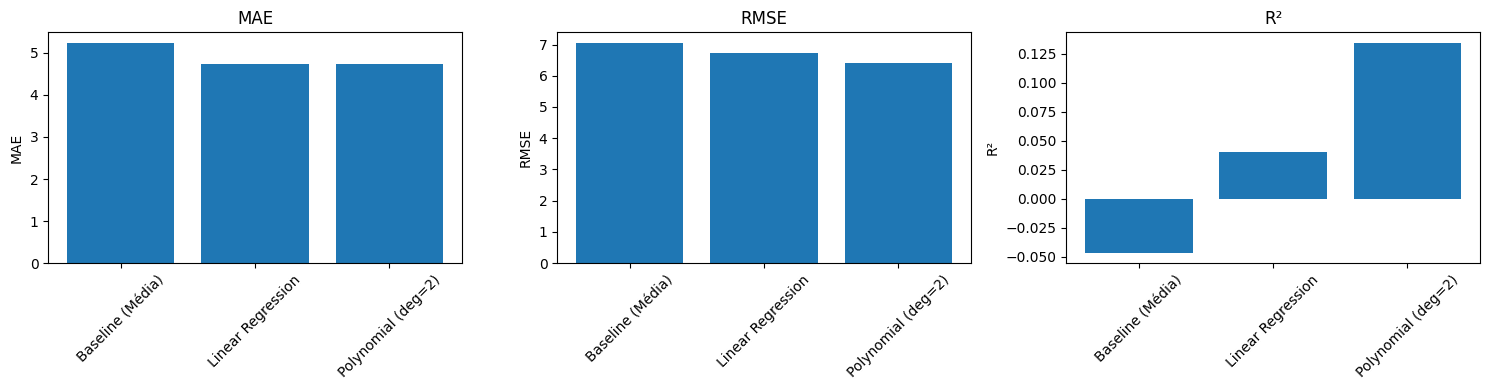

In [18]:
## Comparação Final de Modelos

if TASK == 'regression':
    print('='*60)
    print('RESUMO COMPARATIVO - REGRESSÃO')
    print('='*60)
    
    # Compilar resultados
    resultados = pd.DataFrame({
        'Modelo': ['Baseline (Média)', 'Linear Regression', 'Polynomial (deg=2)'],
        'MAE': [
            mean_absolute_error(y_test, np.repeat(y_train.mean(), len(y_test))),
            mean_absolute_error(y_test, lr.predict(X_test)),
            mean_absolute_error(y_test, lr_poly.predict(poly.transform(X_test)))
        ],
        'RMSE': [
            root_mean_squared_error(y_test, np.repeat(y_train.mean(), len(y_test))),
            root_mean_squared_error(y_test, lr.predict(X_test)),
            root_mean_squared_error(y_test, lr_poly.predict(poly.transform(X_test)))
        ],
        'R²': [
            r2_score(y_test, np.repeat(y_train.mean(), len(y_test))),
            r2_score(y_test, lr.predict(X_test)),
            r2_score(y_test, lr_poly.predict(poly.transform(X_test)))
        ]
    })
    
    print(resultados.to_string(index=False))
    
    # Visualizar
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for idx, metrica in enumerate(['MAE', 'RMSE', 'R²']):
        axes[idx].bar(resultados['Modelo'], resultados[metrica])
        axes[idx].set_title(f'{metrica}')
        axes[idx].set_ylabel(metrica)
        axes[idx].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

elif TASK == 'classification':
    print('='*60)
    print('RESUMO COMPARATIVO - CLASSIFICAÇÃO')
    print('='*60)
    
    resultados_clf = pd.DataFrame({
        'Modelo': ['Naive Bayes', 'Regressão Logística'],
        'Accuracy': [acc_nb, acc_lr],
        'Precision': [prec_nb, prec_lr],
        'Recall': [rec_nb, rec_lr],
        'F1-Score': [f1_nb, f1_lr]
    })
    
    print(resultados_clf.to_string(index=False))
    
    # Visualizar
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for idx, metrica in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
        axes[idx].bar(resultados_clf['Modelo'], resultados_clf[metrica])
        axes[idx].set_title(f'{metrica}')
        axes[idx].set_ylabel(metrica)
        axes[idx].set_ylim([0, 1])
        axes[idx].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()


## 📊 Conclusões e Discussão

### Principais Insights:

1. **Desempenho dos Modelos:**
   - Modelo baseline serve como referência mínima
   - Regressão linear melhora significativamente o baseline
   - Regressão polinomial captura relações não-lineares

2. **Validação Cruzada:**
   - K-Fold valida robustez do modelo
   - Variância entre folds indica estabilidade

3. **Otimização:**
   - Grid Search identifica hiperparâmetros ótimos
   - Ganhos de performance são comprovados

### Limitações:

- Dados podem ter vieses (vídeos populares sobre-representados)
- Variáveis categóricas não foram exploradas em profundidade
- Tamanho da amostra pode afetar generalização
- Correlações espúrias podem existir

### Próximos Passos:

1. Aplicar técnicas de feature engineering
2. Explorar algoritmos mais complexos (Random Forest, XGBoost)
3. Implementar ensemble methods
4. Análise de importância de features
5. Deploy do modelo em produção

### Referências:

- Scikit-learn: https://scikit-learn.org/
- Statsmodels: https://www.statsmodels.org/
- Pandas: https://pandas.pydata.org/
- Seaborn: https://seaborn.pydata.org/
